<a href="https://colab.research.google.com/github/grace3999/PPs/blob/master/Kaggle_GOSSIS_dataprep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import scipy as sp
import missingno as msno
import pickle

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster', rc={'font.size':35,
                              'axes.titlesize':50,
                              'axes.labelsize':35})

#machine learning
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [0]:
#data paths
train_data_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/produced/train_data_mine_noimpute.csv'
unlabeled_data_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/produced/test_data_mine_noimpute.csv'

# Train data first


In [4]:
train_supplied = pd.read_csv(train_data_path)
train_supplied = pd.DataFrame(data = train_supplied)

print('Original data shape:\n', train_supplied.shape, '\n')
print('Group value counts:\n', train_supplied['hospital_death'].value_counts(), '\n')

train_supplied.head()

Original data shape:
 (91713, 153) 

Group value counts:
 0    83798
1     7915
Name: hospital_death, dtype: int64 



,Unnamed: 0,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,na_count,param_25_diff_count,param_10_diff_count,age_score,chronic_health_score,disease_count,elective_surgery_score,GCS_score,bun_score,creatinine_score,glucose_score,heart_rate_score,hematocrit_score,map_score,resprate_score,sodium_score,temp_score,wbc_score,d1_calcium_score,d1_hco3_score,d1_hemaglobin_score,d1_platlet_score,d1_potassium_score,d1_diasbp_score,d1_sysbp_score,d1_spo2_score,bun_diff,creatinine_diff,glucose_diff,heart_rate_diff,hematocrit_diff,map_diff,resprate_diff,sodium_diff,temp_diff,wbc_diff,d1_calcium_diff,d1_hco3_diff,d1_hemaglobin_diff,d1_platlet_diff,d1_potassium_diff,d1_diasbp_diff,d1_sysbp_diff,d1_spo2_diff,bmi_score
0,0,0,68.0,22.73,0,0.087262,0.084417,180.3,0.138796,0.134136,0.085168,0.060205,0.541667,73.9,0.157922,0.104856,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.157922,0.108383,60,13,23,13.0,2,1.0,5.0,13.0,12.0,10.0,0.0,5.0,3.0,5.0,6.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,10.0,1.0,0.28,59.0,47.0,0.0,43.0,24.0,2.0,2.7,0.0,1.1,4.0,0.0,0.0,0.6,31.0,58.0,26.0,0.0
1,1,0,77.0,27.42,0,0.087262,0.088373,160.0,0.138796,0.134136,0.085168,0.087495,0.927778,70.2,0.197111,0.197111,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.112068,0.112068,19,0,8,17.0,2,1.0,5.0,5.0,7.0,0.0,0.0,5.0,3.0,8.0,6.0,0.0,2.0,1.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,10.0,2.0,0.15,17.0,46.0,0.8,82.0,20.0,0.0,1.2,10.6,0.6,1.0,0.2,70.0,0.4,64.0,92.0,30.0,1.0
2,2,0,25.0,31.95,0,0.087262,0.088373,172.7,0.087306,0.086385,0.085168,0.087495,0.000694,95.3,0.008493,0.007727,0,0.0,NaN,NaN,3.0,6

### impute missing data

In [5]:
data = train_supplied.drop(['Unnamed: 0', 'hospital_death'], axis=1)

imp = IterativeImputer(max_iter=9, random_state=39, verbose=2).fit(data)
train_supplied_imp = imp.transform(data)

#create final data set
final_data_train = pd.DataFrame(data=train_supplied_imp, columns=data.columns.values)
#put back correct hospital death
final_data_train['hospital_death'] = train_supplied['hospital_death']

final_data_train.head()

[IterativeImputer] Completing matrix with shape (91713, 151)
[IterativeImputer] Ending imputation round 1/9, elapsed time 383.96
[IterativeImputer] Change: 1089.630701071433, scaled tolerance: 0.611 
[IterativeImputer] Ending imputation round 2/9, elapsed time 780.06
[IterativeImputer] Change: 1826.2586138802992, scaled tolerance: 0.611 
[IterativeImputer] Ending imputation round 3/9, elapsed time 1167.43
[IterativeImputer] Change: 1581.1988008029837, scaled tolerance: 0.611 
[IterativeImputer] Ending imputation round 4/9, elapsed time 1594.60
[IterativeImputer] Change: 203.69059229167968, scaled tolerance: 0.611 
[IterativeImputer] Ending imputation round 5/9, elapsed time 2004.58
[IterativeImputer] Change: 126.52521153918953, scaled tolerance: 0.611 
[IterativeImputer] Ending imputation round 6/9, elapsed time 2430.35
[IterativeImputer] Change: 172.6218510406493, scaled tolerance: 0.611 
[IterativeImputer] Ending imputation round 7/9, elapsed time 2802.10
[IterativeImputer] Change: 2

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,na_count,param_25_diff_count,param_10_diff_count,age_score,chronic_health_score,disease_count,elective_surgery_score,GCS_score,bun_score,creatinine_score,glucose_score,heart_rate_score,hematocrit_score,map_score,resprate_score,sodium_score,temp_score,wbc_score,d1_calcium_score,d1_hco3_score,d1_hemaglobin_score,d1_platlet_score,d1_potassium_score,d1_diasbp_score,d1_sysbp_score,d1_spo2_score,bun_diff,creatinine_diff,glucose_diff,heart_rate_diff,hematocrit_diff,map_diff,resprate_diff,sodium_diff,temp_diff,wbc_diff,d1_calcium_diff,d1_hco3_diff,d1_hemaglobin_diff,d1_platlet_diff,d1_potassium_diff,d1_diasbp_diff,d1_sysbp_diff,d1_spo2_diff,bmi_score,hospital_death
0,68.0,22.730000,0.0,0.087262,0.084417,180.3,0.138796,0.134136,0.085168,0.060205,0.541667,73.900000,0.157922,0.104856,0.0,0.0,31.000000,2.510000,3.000000,6.000000,0.000000,4.000000,168.000000,118.0,27.400000,0.0,40.0,36.0,134.000000,39.3,0.0,14.100000,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.000000,63.000000,119.0,108.0,86.0,85.0,86.000000,85.000000,26.000000,18.000000,100.0,74.0,131.0,115.0,131.000000,115.000000,39.500000,37.500000,31.000000,30.000000,8.500000,7.400000,2.510000,2.230000,168.000000,109.000000,19.000000,15.000000,8.900000,8.900000,27.400000,27.400000,233.000000,233.000000,4.000000,3.400000,136.000000,134.000000,14.100000,14.100000,0.100000,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.157922,0.108383,60.0,13.0,23.0,13.0,2.0,1.0,5.0,13.000000,12.000000,10.000000,0.000000,5.0,3.000000,5.0,6.0,0.000000,0.0,0.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.0,0.0,10.0,1.000000,0.280000,59.000000,47.0,0.000000,43.0,24.0,2.000000,2.7,0.000000,1.100000,4.000000,0.000000,0.000000,0.600000,31.0,58.0,26.0,0.000000,0
1,77.0,27.420000,0.0,0.087262,0.088373,160.0,0.138796,0.134136,0.085168,0.087495,0.927778,70.200000,0.197111,0.197111,0.0,0.0,9.000000,0.560000,1.000000,3.000000,0.000000,1.000000,145.000000,120.0,36.900000,0.0,46.0,33.0,145.000000,35.1,1.0,12.700000,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.000000,48.000000,114.0,100.0,85.0,57.0,85.000000,57.000000,31.000000,28.000000,95.0,70.0,95.0,71.0,95.000000,71.000000,36.300000,36.300000,11.000000,9.000000,8.600000,8.000000

In [0]:
#save model
save_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/'
    
pkl_filename = str(save_path + "imp9_151feat_mapping.pkl")  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(imp, file)


In [13]:
test_supplied = pd.read_csv(unlabeled_data_path)
test_supplied = pd.DataFrame(data = test_supplied)

data = test_supplied.drop(['Unnamed: 0', 'hospital_death', 'encounter_id'], axis=1)

test_supplied_imp = imp.transform(data)

#create final data set
final_data_test = pd.DataFrame(data=test_supplied_imp, columns=data.columns.values)
#put back correct hospital death
final_data_test['hospital_death'] = test_supplied['hospital_death']
final_data_test['encounter_id'] = test_supplied['encounter_id']

final_data_test.head()

[IterativeImputer] Completing matrix with shape (39308, 151)
[IterativeImputer] Ending imputation round 1/9, elapsed time 1.87
[IterativeImputer] Ending imputation round 2/9, elapsed time 3.72
[IterativeImputer] Ending imputation round 3/9, elapsed time 5.57
[IterativeImputer] Ending imputation round 4/9, elapsed time 7.39
[IterativeImputer] Ending imputation round 5/9, elapsed time 9.26
[IterativeImputer] Ending imputation round 6/9, elapsed time 11.09
[IterativeImputer] Ending imputation round 7/9, elapsed time 12.91
[IterativeImputer] Ending imputation round 8/9, elapsed time 14.78
[IterativeImputer] Ending imputation round 9/9, elapsed time 16.61


,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,na_count,param_25_diff_count,param_10_diff_count,age_score,chronic_health_score,disease_count,elective_surgery_score,GCS_score,bun_score,creatinine_score,glucose_score,heart_rate_score,hematocrit_score,map_score,resprate_score,sodium_score,temp_score,wbc_score,d1_calcium_score,d1_hco3_score,d1_hemaglobin_score,d1_platlet_score,d1_potassium_score,d1_diasbp_score,d1_sysbp_score,d1_spo2_score,bun_diff,creatinine_diff,glucose_diff,heart_rate_diff,hematocrit_diff,map_diff,resprate_diff,sodium_diff,temp_diff,wbc_diff,d1_calcium_diff,d1_hco3_diff,d1_hemaglobin_diff,d1_platlet_diff,d1_potassium_diff,d1_diasbp_diff,d1_sysbp_diff,d1_spo2_diff,bmi_score,hospital_death
0,68.0,22.730000,0.0,0.087262,0.084417,180.3,0.138796,0.134136,0.085168,0.060205,0.541667,73.900000,0.157922,0.104856,0.0,0.0,31.000000,2.510000,3.000000,6.000000,0.000000,4.000000,168.000000,118.0,27.400000,0.0,40.0,36.0,134.000000,39.3,0.0,14.100000,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.000000,63.000000,119.0,108.0,86.0,85.0,86.000000,85.000000,26.000000,18.000000,100.0,74.0,131.0,115.0,131.000000,115.000000,39.500000,37.500000,31.000000,30.000000,8.500000,7.400000,2.510000,2.230000,168.000000,109.000000,19.000000,15.000000,8.900000,8.900000,27.400000,27.400000,233.000000,233.000000,4.000000,3.400000,136.000000,134.000000,14.100000,14.100000,0.100000,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.157922,0.108383,60.0,13.0,23.0,13.0,2.0,1.0,5.0,13.000000,12.000000,10.000000,0.000000,5.0,3.000000,5.0,6.0,0.000000,0.0,0.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.0,0.0,10.0,1.000000,0.280000,59.000000,47.0,0.000000,43.0,24.0,2.000000,2.7,0.000000,1.100000,4.000000,0.000000,0.000000,0.600000,31.0,58.0,26.0,0.000000,0
1,77.0,27.420000,0.0,0.087262,0.088373,160.0,0.138796,0.134136,0.085168,0.087495,0.927778,70.200000,0.197111,0.197111,0.0,0.0,9.000000,0.560000,1.000000,3.000000,0.000000,1.000000,145.000000,120.0,36.900000,0.0,46.0,33.0,145.000000,35.1,1.0,12.700000,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.000000,48.000000,114.0,100.0,85.0,57.0,85.000000,57.000000,31.000000,28.000000,95.0,70.0,95.0,71.0,95.000000,71.000000,36.300000,36.300000,11.000000,9.000000,8.600000,8.000000

In [0]:
final_data_train.to_csv(save_path + 'train_data_mine_9impute.csv')
final_data_test.to_csv(save_path + 'test_data_mine_9impute.csv')

### Feature selection for continuous variables - remove autocorr




In [0]:
data_feature_selection = data_cat_nocorr75_nomissing75.copy()
X = data_cat_nocorr75_nomissing75.copy().drop('hospital_death',axis = 1)
y = data_cat_nocorr75_nomissing75['hospital_death']

#scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize an empty array to hold feature importances
feature_importances = np.zeros(X_scaled.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)],eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's binary_logloss: 0.305061	valid_0's auc: 0.896198
Early stopping, best iteration is:
[116]	valid_0's binary_logloss: 0.336913	valid_0's auc: 0.897226
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's binary_logloss: 0.310691	valid_0's auc: 0.89453
Early stopping, best iteration is:
[123]	valid_0's binary_logloss: 0.340096	valid_0's auc: 0.895239


In [0]:
feature_importances = feature_importances / 2
feature_importances_df = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances}).sort_values('importance', ascending = False).reset_index(drop=True)
feature_importances_df['importance_normalized'] = feature_importances_df['importance'] / feature_importances_df['importance'].sum()
feature_importances_df['cumulative_importance'] = np.cumsum(feature_importances_df['importance_normalized'])
feature_importances_df.head()

,feature,importance,importance_normalized,cumulative_importance
0,apache_4a_hospital_death_prob,225.0,0.062762,0.062762
1,age,121.5,0.033891,0.096653
2,d1_lactate_max,120.0,0.033473,0.130126
3,creatinine_apache,99.5,0.027755,0.157880
4,d1_heartrate_min,97.5,0.027197,0.185077


In [0]:
#keep features that explain 75% of importance
features_75 = feature_importances_df[feature_importances_df['cumulative_importance'] < 0.75]
print(features_75.shape)
data_cat_nocorr75_nomissing75_features75 = data_cat_nocorr75_nomissing75.copy()[features_75['feature'].values]
#add back y
data_cat_nocorr75_nomissing75_features75['hospital_death'] = y
data_cat_nocorr75_nomissing75_features75.shape

(35, 4)


(91713, 36)

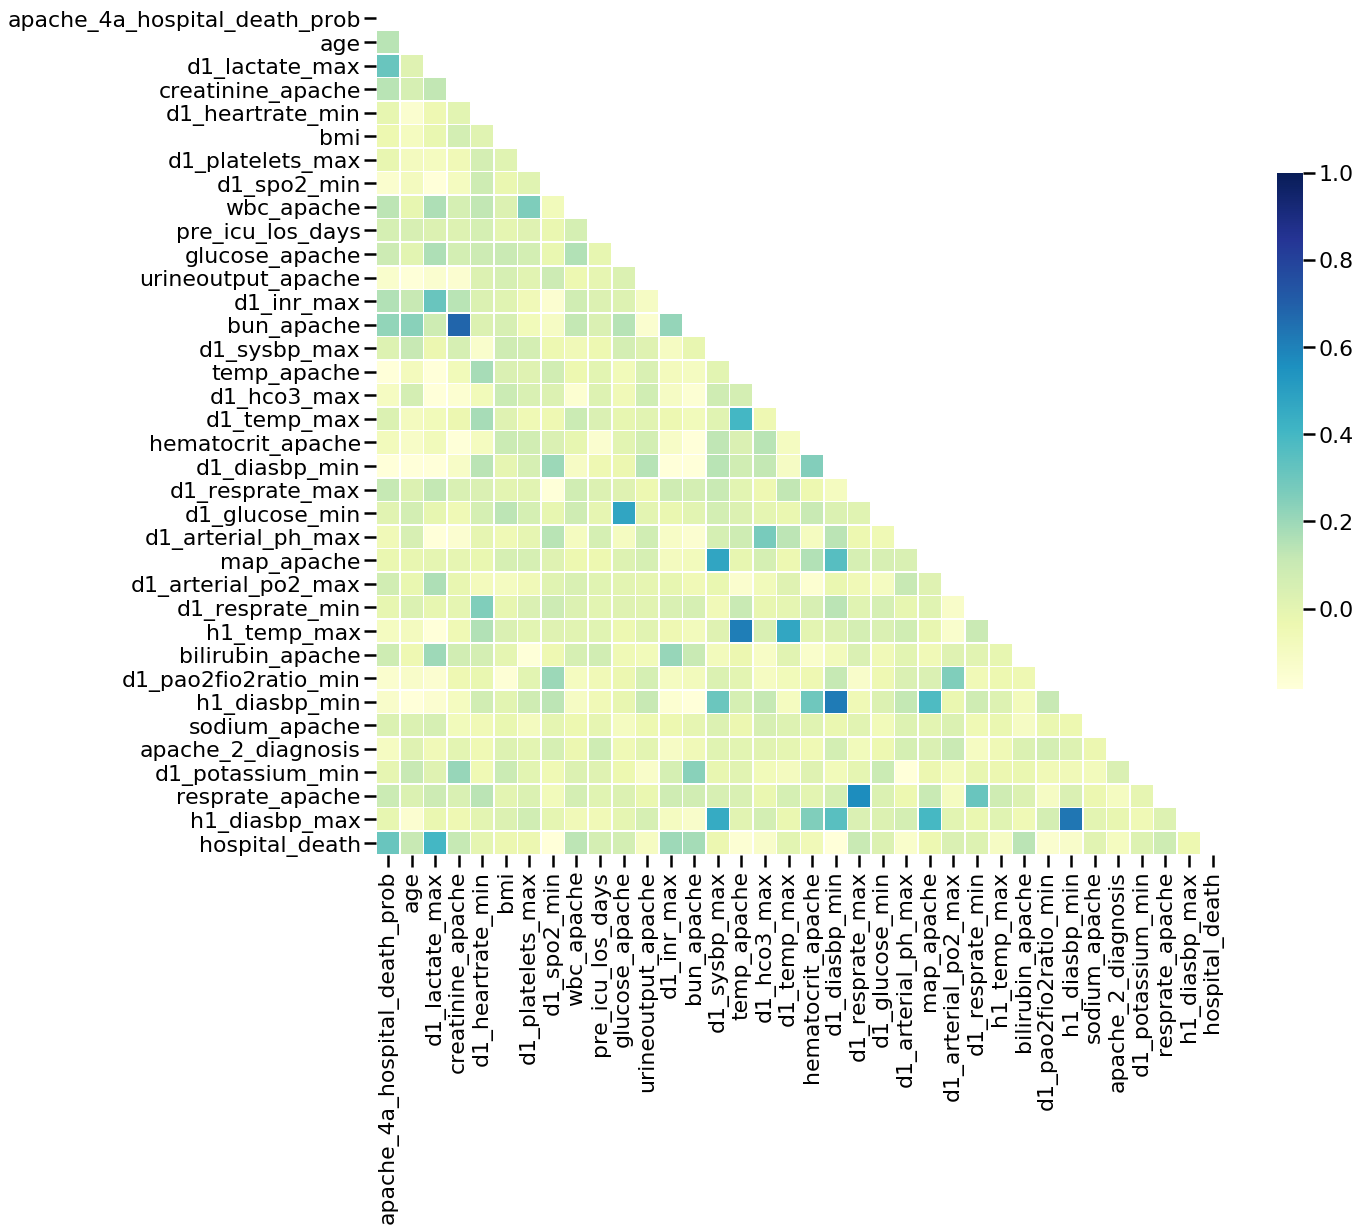

In [0]:
#explore autocorrelation across data set
corr = data_cat_nocorr75_nomissing75_features75.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(19,19))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})


### Impute missing data


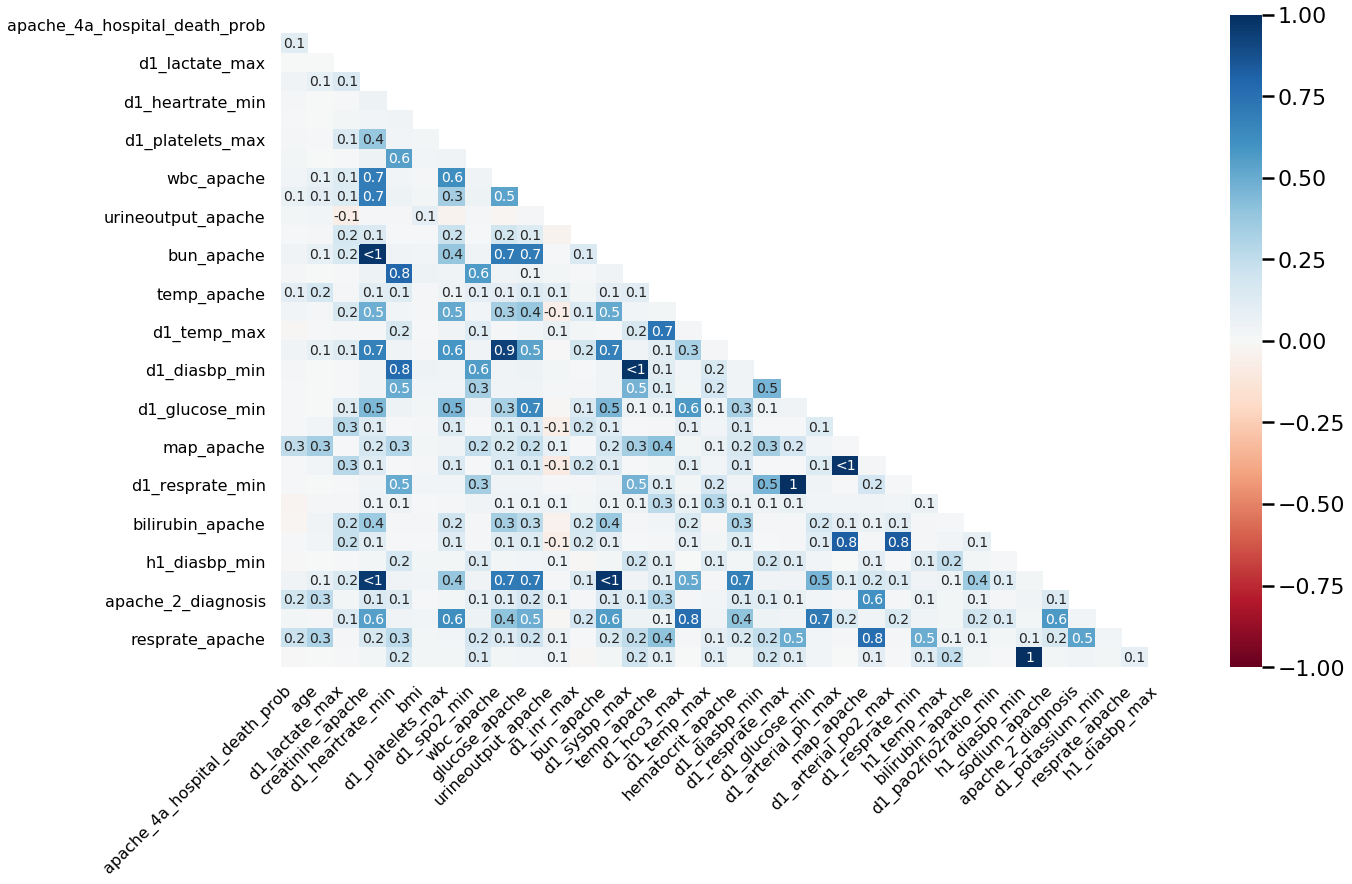

In [0]:
#use missingo to viz missing data
msno.heatmap(data_cat_nocorr75_nomissing75_features75)

In [0]:
save_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/'

#save model
pkl_filename = str(save_path + "data_cat_nocorr75_nomissing75_features75_impute_model.pkl")  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(imp, file)

In [0]:
#create final data set
final_data = pd.DataFrame(data=data_cat_nocorr75_nomissing75_features75_impute.copy(), columns=data_cat_nocorr75_nomissing75_features75.copy().drop('hospital_death',axis = 1).columns.values)
#put back correct hospital death
final_data['hospital_death'] = y
#final_data.to_csv(str(save_path + "'data_cat_nocorr75_nomissing75_features75_impute.csv"))
final_data.head()

,apache_4a_hospital_death_prob,age,d1_lactate_max,creatinine_apache,d1_heartrate_min,bmi,d1_platelets_max,d1_spo2_min,wbc_apache,pre_icu_los_days,glucose_apache,urineoutput_apache,d1_inr_max,bun_apache,d1_sysbp_max,temp_apache,d1_hco3_max,d1_temp_max,hematocrit_apache,d1_diasbp_min,d1_resprate_max,d1_glucose_min,d1_arterial_ph_max,map_apache,d1_arterial_po2_max,d1_resprate_min,h1_temp_max,bilirubin_apache,d1_pao2fio2ratio_min,h1_diasbp_min,sodium_apache,apache_2_diagnosis,d1_potassium_min,resprate_apache,h1_diasbp_max,hospital_death
0,0.100000,68.0,1.300000,2.510000,72.0,22.730000,233.000000,74.0,14.100000,0.541667,168.000000,1607.605936,1.665009,31.000000,131.0,39.3,19.000000,39.9,27.400000,37.0,34.0,109.000000,7.416446,40.0,136.071740,10.0,39.500000,0.400000,217.123250,63.0,134.000000,113.0,3.400000,36.0,68.0,0
1,0.470000,77.0,3.500000,0.560000,72.0,27.420000,557.000000,70.0,12.700000,0.927778,145.000000,929.648710,1.300000,9.000000,159.0,35.1,27.000000,36.3,36.900000,31.0,32.0,128.000000,7.450000,46.0,51.000000,12.0,36.300000,0.427786,51.000000,48.0,145.000000,108.0,3.800000,33.0,61.0,0
2,0.000000,25.0,2.133137,1.425985,68.0,31.950000,227.437638,91.0,11.608361,0.000694,160.394402,2168.368266,1.331843,16.822774,148.0,36.7,23.785449,37.0,35.150898,48.0,21.0,107.934616,7.364035,68.0,157.225610,8.0,36.700000,1.091700,287.574053,58.0,137.514235,122.0,3.857045,37.0,88.0,0
3,0.040000,81.0,3.594894,1.214483,92.0,22.640000,198.000000,95.0,8.000000,0.000694,185.000000,2399.562708,1.600000,23.822505,158.0,34.8,24.561418,38.0,25.900000,42.0,23.0,88.000000,7.440000,60.0,337.000000,7.0,35.600000,1.308313,236.666667,44.0,139.512585,203.0,3.500000,4.0,62.0,0
4,-0.023474,19.0,1.616903,1.097976,60.0,31.402377,228.457185,96.0,10.882716,0.073611,149.318267,2425.161154,1.149381,10.470613,147.0,36.7,24.041971,37.2,37.739730,57.0,18.0,107.545937,7.379960,103.0,161.456637,16.0,36.899313,0.875312,298.659051,68.0,137.644469,119.0,3.766134,16.0,99.0,0


# shallow learning


In [0]:

#split data
train, test = train_test_split(final_data.copy(), test_size = .3, random_state=1, stratify = final_data['hospital_death'])

Y_train = train['hospital_death']
Y_test = test['hospital_death']


X_train = train.drop('hospital_death',axis = 1)
X_test = test.drop('hospital_death',axis = 1)


In [0]:
#scale data algo
scaler = StandardScaler()

#k fold algo
strat_k_fold = StratifiedKFold(n_splits=10)

#classifier algos
dm_cv = DummyClassifier(strategy='stratified', random_state=39)
lr_cv = LogisticRegression(random_state=39, class_weight='balanced')
rf_cv = RandomForestClassifier(random_state=39, class_weight='balanced')
knn_cv = KNeighborsClassifier()
ab_cv = AdaBoostClassifier(random_state=39)
gb_cv = GradientBoostingClassifier(random_state=39)
svm_cv = SVC(kernel='rbf', probability=False, class_weight='balanced') 
lgb_cv = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

#dic with classifier and feature importance attribute name
models_dic = {'dm_cv': (dm_cv, 'none'), 
              'lr_cv': (lr_cv, 'coef'), 
              'rf_cv': (rf_cv, 'feature_importance'),
              'lgb_cv': (lgb_cv, 'none'), 
              'ab_cv': (ab_cv, 'feature_importance'),
              'knn_cv': (knn_cv, 'none'),
              'svm_cv':(svm_cv, 'coef')}

#'gb_cv': (gb_cv, 'feature_importance'),

In [0]:
def feature_importance(X, y, model_instance, feature_names, fi_name):
    #takes in features (X) and classess (y), model, column names for features in X, and name of attribute for feature importance
    #returns dictionary of feature names and coef/feature importance values
    
    feature_importance_dic = {}
    
    model_instance.fit(X, y)
    
    if fi_name == 'coef':
        coef = model_instance.coef_[0]
        feature_importance_dic = dict(zip(feature_names, coef))
    if fi_name == 'feature_importance':
        coef = model_instance.feature_importances_
        feature_importance_dic = dict(zip(feature_names, coef))
    if fi_name == 'none':
        coef = np.zeros(len(feature_names))
        feature_importance_dic = dict(zip(feature_names, coef))
    
    return feature_importance_dic

In [0]:
def classification_pipeline(X, y, cv_instance, model_instance, feature_names, fi_name):
    
    #scale data
    data_scaled = scaler.fit_transform(X)
    
    #generate cross-val sets
    cv = list(cv_instance.split(data_scaled, y))
    
    #predict class and predict probability 
    y_pred = cross_val_predict(model_instance, data_scaled, y, cv=cv, method='predict')
    y_pred_prob = cross_val_predict(model_instance, data_scaled, y, cv=cv, method='predict_proba')
    
    #generate confusion matrix
    conf_mat = confusion_matrix(y, y_pred)
    print('Confusion matrix:', conf_mat)
    
    #generate ROC_AUC
    ROC_AUC = metrics.roc_auc_score(y, y_pred_prob[:,1])
    print("ROC_AUC: ", ROC_AUC)
    
    # generate additional metrics
    recall = metrics.recall_score(y,y_pred)
    precision = metrics.precision_score(y,y_pred)
    accuracy = metrics.accuracy_score(y,y_pred)
    F1 = metrics.f1_score(y,y_pred)
    print("Sensitivity/Recall (TPR): ",recall)
    print("Precision (PPV): ", precision)
    print("Accuracy: ", accuracy)
    print("F1:", F1)
    
    #determine feature importance
    #feature_dic = feature_importance(data_scaled, y, model_instance, feature_names, fi_name)
    
    #create dic
    data_dic = {}
    data_dic['y_pred'] = y_pred
    data_dic['y_pred_prob'] = y_pred_prob
    data_dic['conf_mat'] = conf_mat
    data_dic['ROC_AUC'] = ROC_AUC
    data_dic['recall'] = recall
    data_dic['precision'] = precision
    data_dic['accuracy'] = accuracy
    data_dic['F1'] = F1
    
    #data_dic = {**data_dic, **feature_dic}
    
    return data_dic

In [0]:
feature_set = 'full'
feature_names = X_train.columns.values

data_full_features = {}

models_dic = {'dm_cv': (dm_cv, 'none'), 
              'lr_cv': (lr_cv, 'coef'),
              'lgb_cv': (lgb_cv, 'none'), 
              'ab_cv': (ab_cv, 'feature_importance'),
              'knn_cv': (knn_cv, 'none')}

for name, model in models_dic.items():
    print(f'{name} model with {feature_set} features:')
    data_full_features[name + '_' + feature_set] = classification_pipeline(X_train, Y_train, strat_k_fold, model[0], feature_names, model[1])
    print('\n')

dm_cv model with full features:
Confusion matrix: [[53177  5482]
 [ 5002   538]]
ROC_AUC:  0.5018282593091578
Sensitivity/Recall (TPR):  0.09711191335740073
Precision (PPV):  0.0893687707641196
Accuracy:  0.8366952756273462
F1: 0.09307958477508652


lr_cv model with full features:
Confusion matrix: [[47061 11598]
 [ 1529  4011]]
ROC_AUC:  0.8382687573895087
Sensitivity/Recall (TPR):  0.7240072202166065
Precision (PPV):  0.25696713434556984
Accuracy:  0.7955264100686926
F1: 0.379308714360017


lgb_cv model with full features:
Confusion matrix: [[57685   974]
 [ 3707  1833]]
ROC_AUC:  0.8737192159321608
Sensitivity/Recall (TPR):  0.33086642599277977
Precision (PPV):  0.6530103313145708
Accuracy:  0.9270860916836711
F1: 0.4391997124715466


ab_cv model with full features:
Confusion matrix: [[57713   946]
 [ 3853  1687]]
ROC_AUC:  0.8760072810836024
Sensitivity/Recall (TPR):  0.30451263537906137
Precision (PPV):  0.6407140144322067
Accuracy:  0.925248056823315
F1: 0.41282270891961337


knn

KeyboardInterrupt: ignored

In [0]:
#put dics in pandas df 
final_dic = {**data_full_features}
data_pandas = pd.DataFrame.from_dict(data = final_dic, orient='index')
data_pandas.sort_values('precision', ascending=False).head()

In [0]:
#run on test data with best optimized model
#scale data
X_train = scaler.fit_transform(X_train)
lr_cv .fit(X_train, Y_train)
test_scaled = scaler.fit_transform(X_test)

print('GB test AUC: {}'.format(lr_cv.score(test_scaled, Y_test)))
test_pred_gb = lr_cv.predict(test_scaled)
test_pred_prob_gb = lr_cv.predict_proba(test_scaled)
print(classification_report(Y_test, test_pred_gb))
print(confusion_matrix(Y_test, test_pred_gb))

GB test AUC: 0.802282474376681
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     25139
           1       0.27      0.75      0.40      2375

    accuracy                           0.80     27514
   macro avg       0.62      0.78      0.64     27514
weighted avg       0.91      0.80      0.84     27514

[[20293  4846]
 [  594  1781]]


# Save final models

In [0]:
#pickel model to save for later use with test set
save_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/'

#classification model
pkl_filename = str(save_path + "classification_model_comb.pkl")  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(eclf1, file)

# Use models on test set


In [0]:
data_test = pd.read_csv(unlabeled_data_path)
data_test = pd.DataFrame(data = data_test)

print('Original data shape:\n', data_test.shape, '\n')
print('Group value counts:\n', data_test['hospital_death'].value_counts(), '\n')

data_test.head()

Original data shape:
 (39308, 186) 

Group value counts:
 Series([], Name: hospital_death, dtype: int64) 



,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.102439,0,Caucasian,M,180.3,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.104167,0,68.6,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,NaN,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,NaN,NaN,NaN,NaN,5.0,134.0,36.6,1121.1264,0.0,4.7,NaN,NaN,74.0,51.0,74.0,51.0,100.0,78.0,NaN,NaN,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,NaN,NaN,121.0,79.0,121.0,79.0,37.1,36.6,NaN,NaN,55.0,51.0,55.0,51.0,88.0,84.0,NaN,NaN,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,NaN,NaN,91.0,79.0,91.0,79.0,36.6,36.6,3.7,3.7,NaN,NaN,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,NaN,NaN,NaN,NaN,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,NaN,19.500595,1,Caucasian,F,145.0,Operating Room,Operating 

In [0]:
final_data.columns.values

array(['apache_4a_hospital_death_prob', 'age', 'd1_lactate_max',
       'creatinine_apache', 'd1_heartrate_min', 'bmi', 'd1_platelets_max',
       'd1_spo2_min', 'wbc_apache', 'pre_icu_los_days', 'glucose_apache',
       'urineoutput_apache', 'd1_inr_max', 'bun_apache', 'd1_sysbp_max',
       'temp_apache', 'd1_hco3_max', 'd1_temp_max', 'hematocrit_apache',
       'd1_diasbp_min', 'd1_resprate_max', 'd1_glucose_min',
       'd1_arterial_ph_max', 'map_apache', 'd1_arterial_po2_max',
       'd1_resprate_min', 'h1_temp_max', 'bilirubin_apache',
       'd1_pao2fio2ratio_min', 'h1_diasbp_min', 'sodium_apache',
       'apache_2_diagnosis', 'd1_potassium_min', 'resprate_apache',
       'h1_diasbp_max', 'hospital_death'], dtype=object)

In [0]:
features = final_data.columns.values
features_no_death = final_data.drop('hospital_death',axis = 1).columns.values

#data_test_cat = enc.transform(data_test[features])
data_test_imp = imp.transform(data_test[features_no_death])

#create final data set
final_data_entry = pd.DataFrame(data=data_test_imp, columns=data_test[features_no_death].columns.values)
final_data_entry.head()

[IterativeImputer] Completing matrix with shape (39308, 35)
[IterativeImputer] Ending imputation round 1/51, elapsed time 0.12
[IterativeImputer] Ending imputation round 2/51, elapsed time 0.25
[IterativeImputer] Ending imputation round 3/51, elapsed time 0.38
[IterativeImputer] Ending imputation round 4/51, elapsed time 0.50
[IterativeImputer] Ending imputation round 5/51, elapsed time 0.61
[IterativeImputer] Ending imputation round 6/51, elapsed time 0.73
[IterativeImputer] Ending imputation round 7/51, elapsed time 0.83
[IterativeImputer] Ending imputation round 8/51, elapsed time 0.98
[IterativeImputer] Ending imputation round 9/51, elapsed time 1.10
[IterativeImputer] Ending imputation round 10/51, elapsed time 1.22
[IterativeImputer] Ending imputation round 11/51, elapsed time 1.34
[IterativeImputer] Ending imputation round 12/51, elapsed time 1.46
[IterativeImputer] Ending imputation round 13/51, elapsed time 1.56
[IterativeImputer] Ending imputation round 14/51, elapsed time 1.

,apache_4a_hospital_death_prob,age,d1_lactate_max,creatinine_apache,d1_heartrate_min,bmi,d1_platelets_max,d1_spo2_min,wbc_apache,pre_icu_los_days,glucose_apache,urineoutput_apache,d1_inr_max,bun_apache,d1_sysbp_max,temp_apache,d1_hco3_max,d1_temp_max,hematocrit_apache,d1_diasbp_min,d1_resprate_max,d1_glucose_min,d1_arterial_ph_max,map_apache,d1_arterial_po2_max,d1_resprate_min,h1_temp_max,bilirubin_apache,d1_pao2fio2ratio_min,h1_diasbp_min,sodium_apache,apache_2_diagnosis,d1_potassium_min,resprate_apache,h1_diasbp_max
0,0.13,56.000000,1.593082,0.670000,78.0,21.102439,223.0,96.0,4.700000,0.104167,276.000000,1121.126400,1.185698,19.000000,121.0,36.6,24.000000,37.1,42.000000,51.0,20.0,167.0,7.331294,57.0,144.149604,8.0,36.600000,0.683885,280.008897,51.000000,134.000000,301.0,4.8,5.0,55.00000
1,0.09,82.065002,2.402000,1.659085,60.0,19.500595,93.0,90.0,8.345967,0.230556,118.411114,843.436800,1.617890,32.739606,148.0,37.0,31.000000,37.7,30.380944,31.0,33.0,100.0,7.406808,53.0,155.689960,16.0,36.600000,1.575885,222.831062,44.000000,139.013984,217.0,4.4,37.0,50.00000
2,0.03,66.000000,2.016686,1.840000,86.0,32.518596,184.0,95.0,14.800000,0.140972,81.000000,1728.000000,1.429157,22.000000,172.0,35.5,22.000000,37.5,39.200000,57.0,28.0,81.0,7.362438,115.0,166.708938,10.0,36.311082,1.661804,241.420876,72.869034,130.000000,302.0,4.5,31.0,86.90831
3,0.19,64.000000,0.800000,0.750000,60.0,20.798520,248.0,92.0,9.700000,0.002083,122.000000,1434.412800,1.400000,24.000000,115.0,37.7,22.000000,38.4,32.000000,42.0,35.0,122.0,7.370000,48.0,142.000000,15.0,38.000000,0.800000,114.000000,57.000000,133.000000,303.0,4.0,30.0,62.00000
4,0.50,56.000000,2.631807,0.520000,62.0,30.857186,223.0,95.0,14.500000,0.004861,192.000000,1892.740565,1.000000,11.000000,222.0,36.1,23.953713,37.9,32.800000,24.0,21.0,141.0,7.413974,41.0,212.743615,0.0,36.000000,1.259818,270.694293,66.000000,134.000000,217.0,3.5,5.0,81.00000


In [0]:
test = scaler.fit_transform(final_data_entry)
probstest = lr_cv.predict_proba(test)
probstest = probstest[:, 1]
data_test["hospital_death"] = probstest
data_test[["encounter_id","hospital_death"]].to_csv(str(save_path + "submissioncomb.csv"),index=False)
data_test[["encounter_id","hospital_death"]].head()

,encounter_id,hospital_death
0,2,0.165257
1,5,0.490031
2,7,0.281718
3,8,0.399126
4,10,0.485006


In [0]:
save_path = '/content/gdrive/My Drive/Colab_projects/GOSSIS_kaggle/'
data_test[["encounter_id","hospital_death"]].to_csv(str(save_path + "submissioncomb.csv"),index=False)

In [0]:
#scale data algo
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

eclf2 = VotingClassifier(estimators=[
        ('lr', lr_cv), ('rf', rf_cv), ('gb', gb_cv), ('ab', ab_cv)], 
                         voting='soft', weights=[5,1,1,1])
eclf2 = eclf2.fit(X_train, Y_train)
print('Train AUC with soft voting: ', eclf2.score(X_train, Y_train))
print('Test AUC with soft voting: ', eclf2.score(X_test, Y_test))
test_pred_hard = eclf2.predict(X_test)
test_pred_prob_hard = eclf2.predict_proba(X_test)
print(classification_report(Y_test, test_pred_hard))
print(confusion_matrix(Y_test, test_pred_hard))

Train AUC with soft voting:  0.8819103696434413
Test AUC with soft voting:  0.8688473520249221
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     58659
           1       0.36      0.67      0.47      5541

    accuracy                           0.87     64200
   macro avg       0.66      0.78      0.70     64200
weighted avg       0.91      0.87      0.89     64200

[[52043  6616]
 [ 1804  3737]]
